In [2]:
import pandas as pd                  # pandas(판다스) 패키지 임포트
import numpy as np                   # Numpy(넘파이) 패키지 임포트
import matplotlib.pyplot as plt      # Matplotlib(맷플롯립) 패키지의 pyplot 모듈을 plt로 임포트
from matplotlib import rcParams      # 한글 환경 설정을 위한 rcParams 임포트
import seaborn as sns                # Seaborn(씨본) 패키지 임포트
import warnings
%matplotlib inline


# 경고창 무시
warnings.filterwarnings('ignore')

pd.read_excel('../Datasets/2023년_학교현황(초)_부산광역시교육청.xlsx')     #../ : 상위 디렉토리 (./ : 현재 디렉토리)

,시도교육청,지역교육청,지역,정보공시 \n 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수
0,부산광역시교육청,교육부,부산광역시 연제구,S000003559,부산교육대학교부설초등학교,2,국립,N,NaN,4.0,4.0,4.0,4.0,4.0,4.0,1.0,0.0,25(1),592(7),23.68
1,부산광역시교육청,부산광역시서부교육지원청,부산광역시 중구,S020000625,광일초등학교,2,공립,N,NaN,2.0,2.0,2.0,2.0,3.0,3.0,1.0,0.0,15(1),294(4),19.60
2,부산광역시교육청,부산광역시서부교육지원청,부산광역시 중구,S020000626,남성초등학교,2,사립,N,NaN,3.0,3.0,3.0,3.0,3.0,2.0,0.0,0.0,17(0),483(0),28.41
3,부산광역시교육청,부산광역시남부교육지원청,부산광역시 남구,S020000628,대남초등학교,2,공립,N,NaN,2.0,3.0,3.0,2.0,3.0,3.0,1.0,0.0,17(1),329(6),19.35
4,부산광역시교육청,부산광역시남부교육지원청,부산광역시 남구,S020000629,대연초등학교,2,공립,N,NaN,5.0,6.0,6.0,7.0,7.0,7.0,1.0,0.0,39(1),929(5),23.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,부산광역시교육청,부산광역시북부교육지원청,부산광역시 강서구,S020002257,명일초등학교,2,공립,N,NaN,7.0,6.0,6.0,6.0,5.0,4.0,2.0,0.0,36(2),821(12),22.81
301,부산광역시교육청,부산광역시북부교육지원청,부산광역시 강서구,S020002276,명원초등학교,2,공립,N,NaN,8.0,11.0,12.0,10.0,9.0,9.0,1.0,0.0,60(1),1766(7),29.43
302,부산광역시교육청,부산광역시해운대교육지원청,부산광역시 기장군,S020002277,일광초등학교,2,공립,N,NaN,7.0,7.0,7.0,7.0,7.0,6.0,1.0,0.0,42(1),1046(6),24.90
303,부산광역시교육청,부산광역시해운대교육지원청,부산광역시 기장군,S020002312,해빛초등학교,2,공립,N,NaN,9.0,7.0,7.0,5.0,5.0,5.0,1.0,0.0,39(1),948(7),24.31


In [3]:
#지역 정보에서 '부산광역시' 문자열 삭제

df_school_info = pd.read_excel('../Datasets/2023년_학교현황(초)_부산광역시교육청.xlsx')
df_school_info["지역"] = df_school_info["지역"].str.replace("부산광역시 ", "")
df_school_info["지역"]

0      연제구
1       중구
2       중구
3       남구
4       남구
      ... 
300    강서구
301    강서구
302    기장군
303    기장군
304    강서구
Name: 지역, Length: 305, dtype: object

In [5]:
#한글깨짐 폰트 설정

from matplotlib import font_manager, rc

plt.rcParams['font.family'] = 'NanumGothic'
#font_name = font_manager.FontProperties(fname="./NanumGothic.ttf").get_name()
#rc('font', family=font_name)

In [12]:
#지역별 초등학교 개수 Count
df_school_info[["지역"]].groupby(by="지역")["지역"].count().reset_index(name= "count")

,지역,count
0,강서구,19
1,금정구,21
2,기장군,22
3,남구,21
4,동구,6
5,동래구,23
6,부산진구,32
7,북구,27
8,사상구,21
9,사하구,26


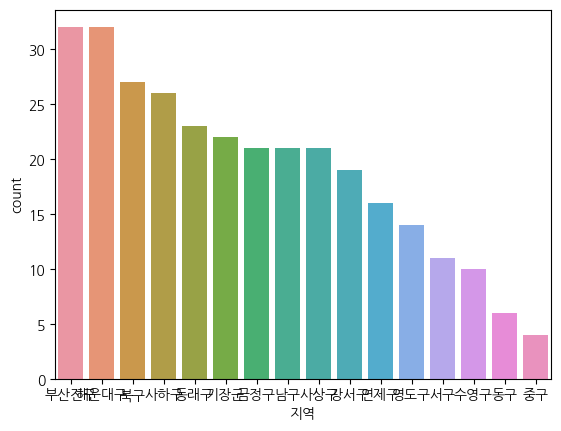

In [7]:
#지역별 초등학교 분포 그래프

df_school_info_group_by_city = df_school_info[["지역"]].groupby(["지역"])["지역"].count().sort_values(ascending=False).reset_index(name="count")
sns.barplot(data=df_school_info_group_by_city, x="지역", y="count")


plt.rcParams['figure.figsize'] = [10, 5]  #[width, height] 그래프 크기 조정
plt.rc('font', size=2)                    # 폰트 사이즈 조정

In [35]:
#지역별 학급당학생수 평균(mean)
df_school_info_group_by_student_numbers = df_school_info.groupby('지역')['학급당학생수'].mean().reset_index(name= "mean")
df_school_info_group_by_student_numbers

,지역,mean
0,강서구,17.388421
1,금정구,18.912857
2,기장군,18.512273
3,남구,19.806190
4,동구,18.636667
5,동래구,21.725652
6,부산진구,19.707187
7,북구,20.101852
8,사상구,17.092381
9,사하구,20.211923


In [38]:
#지역별 학급당학생수 총합(sum)
df_school_info_group_by_student_numbers = df_school_info.groupby('지역')['학급당학생수'].sum().reset_index(name= "count")
df_school_info_group_by_student_numbers

,지역,count
0,강서구,330.38
1,금정구,397.17
2,기장군,407.27
3,남구,415.93
4,동구,111.82
5,동래구,499.69
6,부산진구,630.63
7,북구,542.75
8,사상구,358.94
9,사하구,525.51


In [37]:
df_school_info[df_school_info["지역"] == '강서구'].sum()          #강서구 데이터만 추출하여 위 학급당학생수 sum 정확한지 확인 

시도교육청           부산광역시교육청부산광역시교육청부산광역시교육청부산광역시교육청부산광역시교육청부산광역시교...
지역교육청           부산광역시북부교육지원청부산광역시북부교육지원청부산광역시북부교육지원청부산광역시북부교육지...
지역              강서구강서구강서구강서구강서구강서구강서구강서구강서구강서구강서구강서구강서구강서구강서구강...
정보공시 \n 학교코드    S020001235S020001244S020001246S020001247S02000...
학교명             가락초등학교녹명초등학교대사초등학교대상초등학교대저초등학교덕두초등학교명지초등학교배영초등...
학교급코드                                                          38
설립구분                       공립공립공립공립공립공립공립공립공립공립공립공립공립공립공립공립공립공립공립
제외여부                                          NNNNNNNNNNNNNNNNNNN
제외사유                                                          0.0
1학년                                                          92.0
2학년                                                          96.0
3학년                                                          92.0
4학년                                                          86.0
5학년                                                          85.0
6학년                                                          81.0
특수학급      

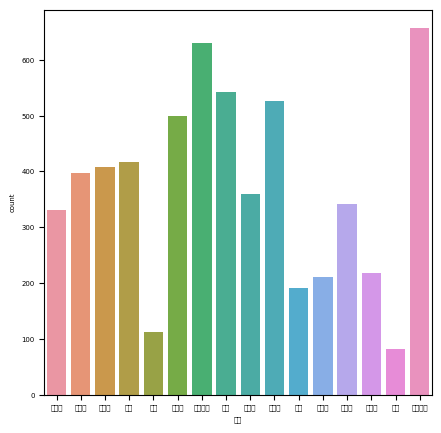

In [39]:
#지역별 학급당학생수 평균 그래프

sns.barplot(x='지역', y='count', data=df_school_info_group_by_student_numbers)

plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('font', size=5)   

In [40]:
df_school_info.sum(axis=0)   #열 총합 계산으로 23년 부산지역 1~6학년 총 학급수 계산

시도교육청           부산광역시교육청부산광역시교육청부산광역시교육청부산광역시교육청부산광역시교육청부산광역시교...
지역교육청           교육부부산광역시서부교육지원청부산광역시서부교육지원청부산광역시남부교육지원청부산광역시남부...
지역              연제구중구중구남구남구남구동구남구남구남구남구동구중구중구남구금정구남구동구남구남구동구동구...
정보공시 \n 학교코드    S000003559S020000625S020000626S020000628S02000...
학교명             부산교육대학교부설초등학교광일초등학교남성초등학교대남초등학교대연초등학교대천초등학교동일중...
학교급코드                                                         610
설립구분            국립공립사립공립공립공립공립공립공립공립공립공립공립공립공립사립공립공립공립공립공립공립공립...
제외여부            NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
제외사유                                                          0.0
1학년                                                        1064.0
2학년                                                        1118.0
3학년                                                        1104.0
4학년                                                        1092.0
5학년                                                        1185.0
6학년                                                        1160.0
특수학급      

In [79]:
df_1 = df_school_info.iloc[:,9:15]
df_1

df_1=pd.melt(df)    #모든 열을 행으로 이동시키기

df_1 = df.rename(columns={
    'variable': '학년',
    'value' : '학급수'
})
print(df_1) 

#sns.barplot(data=df_school_info_group_by_age, x="1학년", y="count")

       학년  학급수
0     1학년  4.0
1     1학년  2.0
2     1학년  3.0
3     1학년  2.0
4     1학년  5.0
...   ...  ...
1825  6학년  4.0
1826  6학년  9.0
1827  6학년  6.0
1828  6학년  5.0
1829  6학년  1.0

[1830 rows x 2 columns]


In [80]:
df_group_by_age = df_1.groupby('학년')["학급수"].sum().reset_index(name="학급수")
df_group_by_age

,학년,학급수
0,1학년,1064.0
1,2학년,1118.0
2,3학년,1104.0
3,4학년,1092.0
4,5학년,1185.0
5,6학년,1160.0


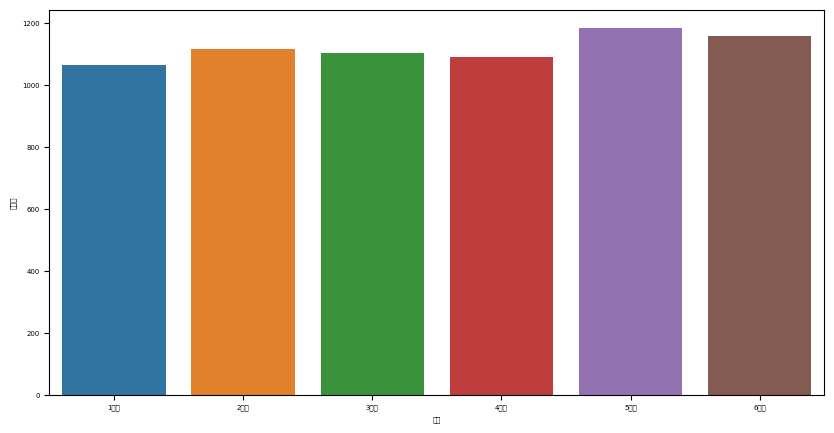

In [45]:
sns.barplot(x='학년', y='학급수', data=df_group_by_age)

plt.rcParams['figure.figsize'] = [5, 5]  #[width, height] 그래프 크기 조정
plt.rc('font', size=5)                    # 폰트 사이즈 조정

In [124]:
pd.read_excel('../Datasets/2023년_성별학생수(초)_부산광역시교육청.xlsx')  
df_student_gender_info = pd.read_excel('../Datasets/2023년_성별학생수(초)_부산광역시교육청.xlsx')
df_student_gender_info

,시도교육청,지역교육청,지역,정보공시 \n 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,1학년(남),...,5학년(여),6학년(남),6학년(여),특수학급(남),특수학급(여),순회학급(남),순회학급(여),계(남),계(여),총계
0,부산광역시교육청,교육부,부산광역시 연제구,S000003559,부산교육대학교부설초등학교,2,국립,N,NaN,47.0,...,47.0,54.0,56.0,4.0,3.0,0.0,0.0,295.0(4.0),297.0(3.0),592.0(7.0)
1,부산광역시교육청,부산광역시서부교육지원청,부산광역시 중구,S020000625,광일초등학교,2,공립,N,NaN,26.0,...,31.0,29.0,31.0,3.0,1.0,0.0,0.0,157.0(3.0),137.0(1.0),294.0(4.0)
2,부산광역시교육청,부산광역시서부교육지원청,부산광역시 중구,S020000626,남성초등학교,2,사립,N,NaN,43.0,...,40.0,25.0,24.0,0.0,0.0,0.0,0.0,248.0(0.0),235.0(0.0),483.0(0.0)
3,부산광역시교육청,부산광역시남부교육지원청,부산광역시 남구,S020000628,대남초등학교,2,공립,N,NaN,29.0,...,36.0,31.0,25.0,4.0,2.0,0.0,0.0,173.0(4.0),156.0(2.0),329.0(6.0)
4,부산광역시교육청,부산광역시남부교육지원청,부산광역시 남구,S020000629,대연초등학교,2,공립,N,NaN,64.0,...,84.0,90.0,81.0,2.0,3.0,0.0,0.0,492.0(2.0),437.0(3.0),929.0(5.0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,부산광역시교육청,부산광역시북부교육지원청,부산광역시 강서구,S020002257,명일초등학교,2,공립,N,NaN,93.0,...,49.0,52.0,36.0,10.0,2.0,0.0,0.0,446.0(10.0),375.0(2.0),821.0(12.0)
301,부산광역시교육청,부산광역시북부교육지원청,부산광역시 강서구,S020002276,명원초등학교,2,공립,N,NaN,113.0,...,133.0,129.0,135.0,5.0,2.0,0.0,0.0,859.0(5.0),907.0(2.0),1766.0(7.0)
302,부산광역시교육청,부산광역시해운대교육지원청,부산광역시 기장군,S020002277,일광초등학교,2,공립,N,NaN,93.0,...,78.0,78.0,70.0,5.0,1.0,0.0,0.0,546.0(5.0),500.0(1.0),1046.0(6.0)
303,부산광역시교육청,부산광역시해운대교육지원청,부산광역시 기장군,S020002312,해빛초등학교,2,공립,N,NaN,108.0,...,66.0,62.0,58.0,4.0,3.0,0.0,0.0,484.0(4.0),464.0(3.0),948.0(7.0)


In [125]:
#지역 정보에서 '부산광역시' 문자열 삭제
df_student_gender_info["지역"] = df_student_gender_info["지역"].str.replace("부산광역시 ", "")
df_student_gender_info["지역"]

0      연제구
1       중구
2       중구
3       남구
4       남구
      ... 
300    강서구
301    강서구
302    기장군
303    기장군
304    강서구
Name: 지역, Length: 305, dtype: object

In [8]:
#지역별 학생 성비???
df_student_gender_info[["지역"]].groupby(by="지역")["지역"].count().reset_index(name= "count")

NameError: name 'df_student_gender_info' is not defined

In [119]:
#학년(성별) 데이터 담긴 열만 추출(행은 전부 추출)
df_student_gender_info.iloc[:, 9:20]

,1학년(남),1학년(여),2학년(남),2학년(여),3학년(남),3학년(여),4학년(남),4학년(여),5학년(남),5학년(여),6학년(남)
0,47.0,48.0,48.0,47.0,47.0,48.0,47.0,48.0,48.0,47.0,54.0
1,26.0,17.0,21.0,15.0,18.0,17.0,26.0,25.0,34.0,31.0,29.0
2,43.0,43.0,53.0,47.0,49.0,50.0,40.0,31.0,38.0,40.0,25.0
3,29.0,17.0,44.0,26.0,27.0,22.0,12.0,28.0,26.0,36.0,31.0
4,64.0,68.0,68.0,67.0,89.0,62.0,84.0,72.0,95.0,84.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...
300,93.0,74.0,80.0,67.0,73.0,86.0,77.0,61.0,61.0,49.0,52.0
301,113.0,110.0,179.0,192.0,167.0,170.0,135.0,165.0,131.0,133.0,129.0
302,93.0,80.0,91.0,98.0,93.0,88.0,93.0,85.0,93.0,78.0,78.0
303,108.0,88.0,87.0,92.0,90.0,93.0,72.0,64.0,61.0,66.0,62.0


In [120]:
#부산지역 학년/성별 기준 학생수 총합
df_student_gender_sum = df_student_gender_info.iloc[:, 9:20].sum()
print(df_student_gender_sum)

1학년(남)    11870.0
1학년(여)    11464.0
2학년(남)    12840.0
2학년(여)    12214.0
3학년(남)    12666.0
3학년(여)    12028.0
4학년(남)    12400.0
4학년(여)    11921.0
5학년(남)    13769.0
5학년(여)    13140.0
6학년(남)    13214.0
dtype: float64


In [121]:
df_2=pd.melt(df_student_gender_info.iloc[:, 9:20])
df_2

#학년&성별에 따른 학생수 총합(sum)
df_student_info_group_by_gender = df_2.groupby('variable')['value'].sum().reset_index(name= "학생수")
df_student_info_group_by_gender

#열 이름 변경(variable -> 학년(성별))
df_student_info_group_by_gender = df_student_info_group_by_gender.rename(columns={'variable': '학년(성별)'})
df_student_info_group_by_gender

,학년(성별),학생수
0,1학년(남),11870.0
1,1학년(여),11464.0
2,2학년(남),12840.0
3,2학년(여),12214.0
4,3학년(남),12666.0
5,3학년(여),12028.0
6,4학년(남),12400.0
7,4학년(여),11921.0
8,5학년(남),13769.0
9,5학년(여),13140.0


<Axes: xlabel='학년(성별)', ylabel='학생수'>

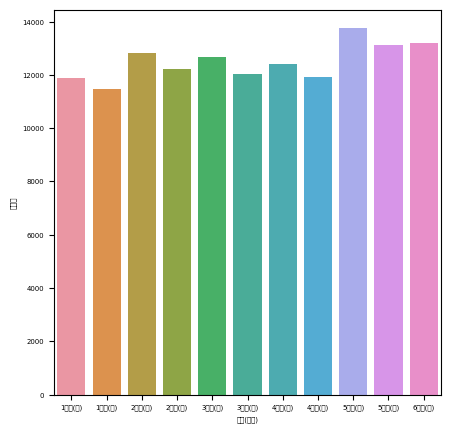

In [126]:
#학년(성별)에 따른 학생수 그래프

sns.barplot(x='학년(성별)', y='학생수', data=df_student_info_group_by_gender)

In [138]:
#지역별 학생 1인당 평균 주당수업 시수와 입학생의 상관관계

In [3]:
pd.read_excel('../Datasets/2023년_수업일수 및 수업시수 현황(초)_부산광역시교육청.xlsx')

,시도교육청,지역교육청,지역,정보공시 \n 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,1학년,2학년,3학년,4학년,5학년,6학년,주당평균수업시수 \n (교사 1인당),주당수업시수,수업교원수
0,부산광역시교육청,교육부,부산광역시 연제구,S000003559,부산교육대학교부설초등학교,2,국립,N,NaN,190.0,190.0,190.0,190.0,190.0,190.0,21.8,633.0,29.0
1,부산광역시교육청,부산광역시서부교육지원청,부산광역시 중구,S020000625,광일초등학교,2,공립,N,NaN,191.0,191.0,191.0,191.0,191.0,191.0,22.9,367.0,16.0
2,부산광역시교육청,부산광역시서부교육지원청,부산광역시 중구,S020000626,남성초등학교,2,사립,N,NaN,192.0,193.0,193.0,193.0,193.0,192.0,18.0,396.0,22.0
3,부산광역시교육청,부산광역시남부교육지원청,부산광역시 남구,S020000628,대남초등학교,2,공립,N,NaN,190.0,190.0,190.0,190.0,190.0,190.0,22.1,441.0,20.0
4,부산광역시교육청,부산광역시남부교육지원청,부산광역시 남구,S020000629,대연초등학교,2,공립,N,NaN,190.0,190.0,190.0,190.0,190.0,190.0,22.3,1005.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,부산광역시교육청,부산광역시북부교육지원청,부산광역시 강서구,S020002257,명일초등학교,2,공립,N,NaN,190.0,190.0,190.0,190.0,190.0,190.0,22.1,905.0,41.0
301,부산광역시교육청,부산광역시북부교육지원청,부산광역시 강서구,S020002276,명원초등학교,2,공립,N,NaN,190.0,190.0,190.0,190.0,190.0,190.0,22.7,1613.0,71.0
302,부산광역시교육청,부산광역시해운대교육지원청,부산광역시 기장군,S020002277,일광초등학교,2,공립,N,NaN,191.0,191.0,191.0,191.0,191.0,191.0,22.3,1095.0,49.0
303,부산광역시교육청,부산광역시해운대교육지원청,부산광역시 기장군,S020002312,해빛초등학교,2,공립,N,NaN,190.0,190.0,190.0,190.0,190.0,190.0,22.0,989.0,45.0


In [ ]:
#지역별 주당 수업시수 총합 구하기

df_student_gender_info = pd.read_excel('../Datasets/2023년_수업일수 및 수업시수 현황(초)_부산광역시교육청.xlsx')

#지역 정보에서 '부산광역시' 문자열 삭제
df_student_gender_info["지역"] = df_student_gender_info["지역"].str.replace("부산광역시 ", "")
df_student_gender_info["지역"]